# Problem 1.1. Distribution of money

The distribution of income in a society f(m) behaves as f(m) ∝m−1−α, where mis the income
(money) and the exponent α is between 1 and 2. The quantity f(m) can be taken to be the
number of people who have an amount of money between m and m+∆m. This power law
behavior of the income distribution is often referred to as Pareto’s law or the 80/20 rule (20%
of the people have 80% of the income) and was proposed in the late 1800’s by Vilfredo Pareto,
an economist and sociologist. In the following, we consider some simple models of a closed
economy to determine the relation between the microdynamics and the resulting macroscopic
distribution of money.

a. Suppose that N agents (people) can exchange money in pairs. For simplicity, we assume
that all the agents are initially assigned the same amount of money m0, and the agents are
then allowed to interact. At each time step, a pair of agents i and j with money mi and mj
is randomly chosen and a transaction takes place. Again for simplicity, let us assume that
mi →m′i and mj →m′j by a random reassignment of their total amount of money, mi + mj,
such that

m′i = ϵ(mi + mj)            (1.1a)
m′j = (1−ϵ)(mi + mj)        (1.1b)

where ϵ is a random number between 0 and 1. Note that this reassignment ensures that the
agents have no debt after the transaction, that is, they are always left with an amount m≥0.
Simulate this model and determine the distribution of money among the agents after the
system has relaxed to an equilibrium state. Choose N = 100 and m0 = 1000.

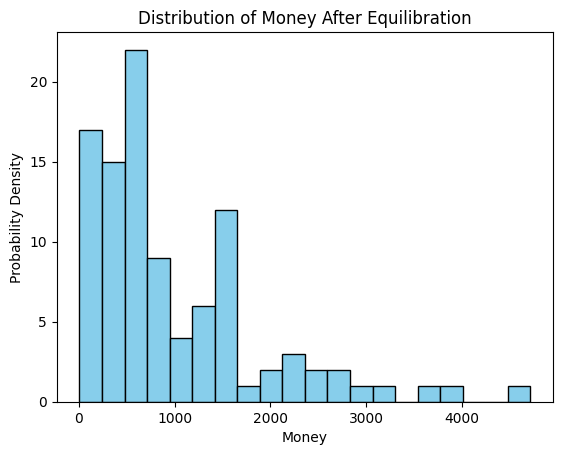

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 100              # Number of agents
m0 = 1000            # Initial money per agent
transactions = 10**6 # Number of transactions

# Initialize the money distribution
money = np.full(N, m0, dtype=float)

# Perform transactions
for _ in range(transactions):
    # Randomly select two agents
    i, j = np.random.choice(N, size=2, replace=False)
    # Total money between the two agents
    total_money = money[i] + money[j]
    # Random fraction for the split
    epsilon = np.random.uniform()
    # Update their money
    money[i] = epsilon * total_money
    money[j] = (1 - epsilon) * total_money

# Plot the distribution of money
plt.hist(money, bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Money After Equilibration")
plt.xlabel("Money")
plt.ylabel("Probability Density")
plt.show()

b. Now let us ask what happens if the agents save a fraction λof their money before the trans-
action. We write

m′i = mi + δm               (1.2a)
m′j= mj−δm                  (1.2b)
δm= (1−λ)[ϵmj−(1−ϵ)mi].     (1.2c)

Modify your program so that this savings model is implemented. Consider λ= 0.25, 0.50,
0.75, and 0.9. For some of the values of λ, as many as 107 transactions will need to be
considered. Does the form of f(m) change for λ>0?

The form of f(m) for the model in Problem 1.1a can be found analytically and is known to
students who have had a course in statistical mechanics. However, the analytical form of f(m)
in Problem 1.1b is not known. More information about this model can be found in the article
by Patriarca, Chakraborti, and Kaski (see the references at the end of this chapter).

Problem 1.1 illustrates some of the characteristics of simulations that we will consider in
the following chapters. Implementing this model on a computer would help you to gain insight
into its behavior and might encourage you to explore variations of the model. Note that the
model lends itself to asking a relatively simple “what if” question, which in this case leads to
qualitatively diﬀerent behavior. Asking similar questions might require modifying only a few
lines of code. However, such a change might convert an analytically tractable problem into one
for which the solution is unknown.

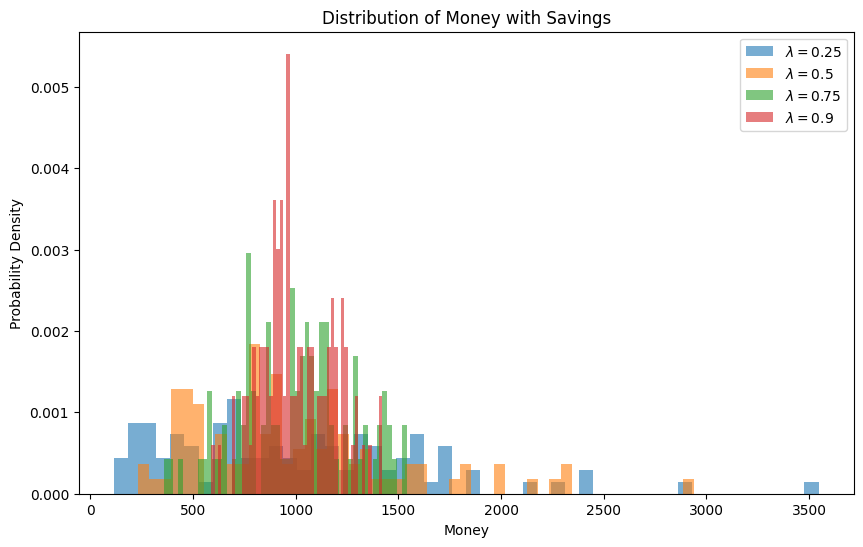

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_with_savings(N, m0, iterations, lam):
    # Initialize money distribution
    money = np.full(N, m0, dtype=float)

    # Perform transactions
    for _ in range(iterations):
        # Randomly select two agents
        i, j = np.random.choice(N, size=2, replace=False)
        # Compute delta m
        epsilon = np.random.random()
        delta_m = (1 - lam) * (epsilon * money[j] - (1 - epsilon) * money[i])
        # Update money with savings consideration
        money[i] = max(0, money[i] + delta_m)
        money[j] = max(0, money[j] - delta_m)

    return money

# Parameters
N = 100         # Number of agents
m0 = 1000       # Initial money per agent
iterations = 10**7  # Number of transactions
lambdas = [0.25, 0.50, 0.75, 0.9]  # Different values of lambda

# Simulate and plot results for different lambdas
plt.figure(figsize=(10, 6))
for lam in lambdas:
    money = simulate_with_savings(N, m0, iterations, lam)
    plt.hist(money, bins=50, density=True, alpha=0.6, label=f"$\lambda = {lam}$")

plt.title("Distribution of Money with Savings")
plt.xlabel("Money")
plt.ylabel("Probability Density")
plt.legend()
plt.show()